# Classification of MNIST

MNIST is a dataset consisting of handwritten numbers 0-9 widely used as a benchmark in machine learning. While the dataset is very simple, it is still in seminal papers to demonstrate proof of concept (i.e. [Dynamic Routing](https://arxiv.org/pdf/1710.09829.pdf)). Below we load some sample digits for you.

Benchmark datasets are very useful, to note a couple other widely used benchmarks: [SVHN](http://ufldl.stanford.edu/housenumbers/) (Street View House Numbers), [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) (Like MNIST, but more fashion), [CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html) (10 and 100 different objects), and [ImageNet](http://www.image-net.org/) (very large real world image dataset).

We load up a downsampled MNIST dataset below. MNIST is usually 28x28, but we will work with 8x8 images.

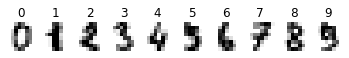

In [1]:
# Import datasets (just run this block)
%matplotlib inline

from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()
for index, (image, label) in enumerate(list(zip(digits.images, digits.target))[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('%i' % label)
plt.show()

# Part I

You will classifiy two numbers of your choice. Start by extracting two features from the image. We suggest looking at intensity and symmetry using `sklearn.model_selection.train_test_split`, a convenient function which will save 10% of the data for testing. We split the dataset into training and test sets. Save your test set so we can evaluate how well you classify.

`X_test` and `y_test` should be used to evaluate the performance of the classifier you build. Moving forward just work with `X_train` and `y_train`.

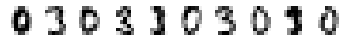

In [2]:
# in this block, you only need to modify number_a and number_b (if you wish to)
from sklearn.model_selection import train_test_split
import numpy as np

#number_a = 0 # TODO choose your digit
#number_b = 3 # TODO choose your digit

##########################################
# Choose my own digits
number_a = 0
number_b = 3
##########################################

digit_a_indexes = np.where(digits.target==number_a) 
digit_b_indexes = np.where(digits.target==number_b)
targets = np.concatenate((digits.target[digit_a_indexes], digits.target[digit_b_indexes]))
images = np.concatenate((digits.images[digit_a_indexes], digits.images[digit_b_indexes]))
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.1, random_state=42)
for index, image in enumerate(X_train[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    #plt.imshow(np.flip(image), cmap = plt.cm.gray_r)
plt.show()

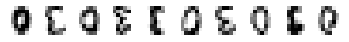

In [3]:
# Plot the flipped image to quantify the stmmetry
for index, image in enumerate(X_train[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    #plt.imshow(image, cmap=plt.cm.gray_r)
    plt.imshow(np.flip(image), cmap = plt.cm.gray_r)
plt.show()

In [4]:
# # Do some housekeeping in this block
# print(type(X_train))
# print(type(X_test))
# print(type(y_train))
# print(type(y_test))
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [5]:
# # Do some housekeeping in this block
# #print(y_train)
# #print(np.where(y_train == number_a))
# print(y_test)
# print(np.where(y_test == number_a))

# 1. Feature Extraction

You will create 2 feature extractors based on the numbers you choose. These will be two functions which take in an image and output a single float. Please use mean or total intensity and a metric that quantifies symmetry. You may change the digits you wish to classify to make this classification problem easier.

In [6]:
# please complete this function:
def compute_features(vector):
    image = vector.reshape(8, 8) # get back original image shape
    def compute_feature_a(image):
        # compute_feature_a will compute ...
        # return np.random.rand(1)[0]
        image_mean = float(np.mean(image))
        #print("image_mean = " + str(image_mean))
        return image_mean

    def compute_feature_b(image):
        # compute_feature_b will compute ...
        # return np.random.rand(1)[0]
        
        # The metric I use to quantify the image symmetry is 
        # to calculate the mean square error (MSE) between 
        # the original image and the flipped image.
        img2 = np.flip(image)
        err_sum = 0
        for i in range(image.shape[0]) :
            for j in range(image.shape[1]) :
                err_sum = err_sum + (image[i, j] - img2[i, j]) ** 2
        mse_symmetry = float(err_sum) / (image.shape[0] * image.shape[1])
        #print("mse_symmetry = " + str(mse_symmetry))
        return mse_symmetry
    
    return compute_feature_a(image), compute_feature_b(image)

Once you compute these two features, you can apply them to your images. Don't worry about the details of the first function below, all it does is map the `compute_features` function you wrote to each image in your `X_train` variable.

Afterwards let us plot the features you've crafted to see if they can separate into two classes.

(2.21875, 69.8125)

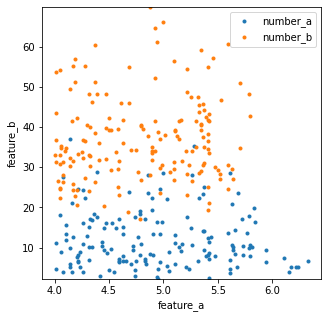

In [7]:
# Apply and plot your features (you can just run this block and inspect the output)

X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]))

#print(type(X_features))
#print(X_features.shape)
#print(X_features)

X_features_a = X_features[np.where(y_train==number_a)]
X_features_b = X_features[np.where(y_train==number_b)]

plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.', label = "number_a")
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.', label = "number_b")
plt.legend()
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max())

# 2. Linear Classification with Pseudo Inverse

`X_features` is a 2 dimensional array of features and `y_train` is our ground truth label. Find the best plane that separates these two classes using the pseudo inverse and plot it. For this problem, as discussed in class, we set the labels as `y=-1` for `number_a` and `y=1` for `number_b`.

The loss $L$ we would like to minimize for each $i$ row in our matrix is.

$$L  = \frac{1}{2}\Sigma (y^{(i)} - W^{T}x^{(i)})^{2}$$

where

$$x^{(i)} = 
\begin{bmatrix}
    feature_a \\
    feature_b \\
\end{bmatrix}$$

$$W = 
\begin{bmatrix}
    w_1 \\
    w_2 \\
\end{bmatrix}$$


In matrix form we convert $x^{(i)}$ into $X$ which is the number of examples we have, in our case is MNIST digit features extracted.

$$X = 
\begin{bmatrix}
    feature_{a1} & feature_{b1} \\
    feature_{a2} & feature_{b2} \\
    ... & ... \\
    feature_{ai} & feature_{bi} \\
\end{bmatrix}$$


$$L  = \frac{1}{2}( Y-XW )^{T} (Y-XW)$$


### Explain

Let's solve L analytically, by setting $\frac{d}{dW}L = 0$ and solving for $W$, showing your steps along the way. 

Step 1: $$L  = \frac{1}{2}( Y-XW )^{T} (Y-XW)$$

Step 2: $$ \frac{d}{dW}L  = \frac{d}{dW} \frac{1}{2}( Y-XW )^{T} (Y-XW)$$

Step 3: $$...$$

(complete the remaining steps in markdown)

In [8]:
# The markdown below is my solution

### My Solution Begins 
Step 4: According to matrix derivative rules, we can have
$$ \frac{d}{dW}L  = \frac {2}{2} X^{T} (XW-Y)  = 0$$

$$ X^{T} (XW-Y)  = 0$$

$$ X^{T} XW - X^{T}Y  = 0$$

$$ X^{T}XW  = X^{T}Y$$

Step 5: Premultiply $ (X^{T}X)^{-1}$ on both sides, we can have

$$ (X^{T}X)^{-1} X^{T}XW  = IW  = W  = (X^{T}X)^{-1} X^{T}Y$$

Therefore, we can solve $W$ as

$$ W  = (X^{T}X)^{-1} X^{T}Y$$
### My Solution Ends

### Compute
Going back to linear algebra, we can re-write the classification problem as $Xw = y^*$, as we did during class. Here, $X$ is our features matrix `X_features` that has the features of each data example along each row, $y^*$ is our `pseudo_y` vector, and $w$ is the unknown weights vector that we'd like to figure out.

The pseudo inverse is $$(X^{T}X)^{-1}X^{T} = X^{+}$$

Solving for $w$, $$w = X^{+}y^*$$

To perform this computation: 

#### (a) create a features vector $X$ and compute its pseudo inverse. (This is the var `X_features`)

#### (b) create a vector like $y^*$ to hold the labels. (Done below for you as `pseudo_y`)

#### (c) find $w$

In [9]:
# (b) y_star == pseudo_y
pseudo_y = np.copy(y_train)
pseudo_y[y_train == number_a] = -1
pseudo_y[y_train == number_b] = 1

#  Calculate x below
# (a) Calculate X_plus (pseudo-inverse)
X = np.copy(X_features)
pseudo_X = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)

# (c) find weights (w)
weights = np.dot(pseudo_X, pseudo_y)
print("The weights I find in (c) are: ")
print("[weight0, weight1]")
print(weights)

The weights I find in (c) are: 
[weight0, weight1]
[-0.25404323  0.05106714]


In [10]:
# Define a function to efficiently find weights
# using the Least Square Solution
def find_weights (X_features, pseudo_y) :
    X = np.copy(X_features)
    y_star = np.copy(pseudo_y)
    
    # X_plus = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    
    X_plus = np.linalg.pinv(X)
    
    weights = np.dot(X_plus, y_star)
    return weights

### (d) To examine the result of the least squares solution under this formulation, compute the train and test error using an appropriate threshold (i.e., 0). Does your trained model generalize well to the test data? 

Create a function called `accuracy_metrics` which does this.

In [11]:
def accuracy_metrics(features, label):
    # features should be your X_features
    # label should be the y^{i} label
    X = np.copy(features)
    pseudo_y = np.copy(label)
    
    # pseudo_X = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    
    pseudo_X = np.linalg.pinv(X)
    
    weights = np.dot(pseudo_X, pseudo_y)
    preds = np.dot(X, weights)
    correct_sum = 0
    for i in range(len(preds)) :
        # Use an appropriate threshold
        # Set the threshold as 0
        if preds[i] <= 0 :
            preds[i] = -1
        else :
            preds[i] = +1
        # Check if the prediction is correct
        if label[i] == preds[i] :
            correct_sum = correct_sum + 1
    accuracy = (float(correct_sum) / len(label))
    return accuracy # Return the % accuracy

In [12]:
# Compute the train accuracy and train error
acc_train = accuracy_metrics(X_features, pseudo_y)
print("Train Accuracy = %.4f" % acc_train)
print("Train Error    = (1 - Train Accuracy) = %.4f" % (1 - acc_train))

Train Accuracy = 0.9228
Train Error    = (1 - Train Accuracy) = 0.0772


In [13]:
# First I need to extract features from the test set
X_features_test = np.apply_along_axis(compute_features, 1,
                                      X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# Second I need to extract labels from the test set
pseudo_y_test = np.copy(y_test)
pseudo_y_test[y_test == number_a] = -1
pseudo_y_test[y_test == number_b] = 1

# Compute the test accuracy and test error
acc_test = accuracy_metrics(X_features_test, pseudo_y_test)
print("Test Accuracy = %.4f" % acc_test)
print("Test Error    = (1 - Test Accuracy) = %.4f" % (1 - acc_test))

Test Accuracy = 0.9189
Test Error    = (1 - Test Accuracy) = 0.0811


#### Question:  
Does your trained model generalize well to the test data?

#### Answer:  
Yes, because my model has a train accuracy of 92.28% and a test accuracy of 91.89%. Both accuracies are very high, which means that my model can also do a good job classifying two numbers in the test set.

### (e) Visualize the decision boundary corresponding to your chosen threshold using the provided `visualize_model` function.  

The function `visualize_model` takes in features, labels, and your calculated weights and shows a matplotlib figure. If we are using a bias term, this function assumes that the weight vector has format: `[weight0, weight1, bias]`. So bias is appended to the back of the weight vector.

In [14]:
import matplotlib.lines as mlines

In [15]:
# just run this block
def newline(weight):
    # adapted from https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
    if len(weight) == 2:
        p1 = weight[0]
        p2 = weight[1]
        ax = plt.gca()
        xmin, xmax = ax.get_xbound()
        if(p2 == 0):
            xmin = xmax = 0
            ymin, ymax = ax.get_ybound()
        else:
            ymax = -p1/p2*(xmax)
            ymin = -p1/p2*(xmin)
        l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = "g", label = "Decision")
        ax.add_line(l)
       
    elif len(weight) == 3:
        p1 = weight[0]
        p2 = weight[1]
        b = weight[2]
        ax = plt.gca()
        xmin, xmax = ax.get_xbound()
        if(p2 == 0):
            xmin = xmax = b/p1
            ymin, ymax = ax.get_ybound()
        else:
            ymax = -p1/p2*(xmax) - b/p2
            ymin = -p1/p2*(xmin) - b/p2
        l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = "g", label = "Decision")
        ax.add_line(l)
       
    return l

def visualize_model(features, labels, weights):
    plt.figure(figsize=(5,5))
    X_features_a = features[np.where(labels==-1)]
    X_features_b = features[np.where(labels==1)]
    plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.', label = "{}".format(number_a))
    plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.', label = "{}".format(number_b))
    plt.xlabel('feature_a')
    plt.ylabel('feature_b')
    plt.ylim(features[:, 1].min(), features[:, 1].max())
    newline(weights)
    plt.gca().legend(loc = 1)
    
    # Self-modified here
    plt.show()
    
    return None

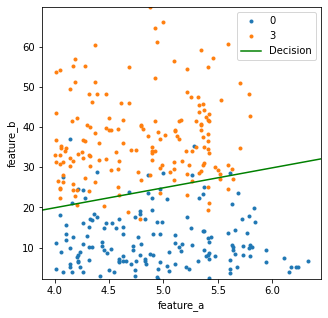

In [16]:
# First, visualize the training set
# should output the datapoints with the decision boundary
visualize_model(X_features, pseudo_y, weights)

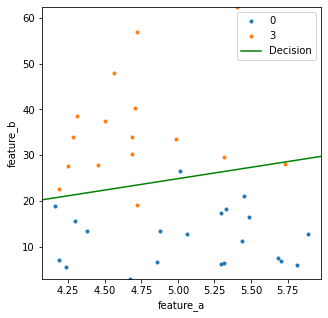

In [17]:
# Second, visualize the testing set
visualize_model(X_features_test, pseudo_y_test, weights)

### (f) Repeat the above steps after adding in a bias term, allowing for the classification line to not pass through the origin. You can do this by augmenting the X feature matrix with an additional feature column of ones, and making the unknown weight vector one entry longer -- does performance improve?

If you created your functions correctly, you shouldn't need to change them and you only need to modify `X_features`. 

In [18]:
# Add bias to features in the training set
# Add bias to features in the testing set
bias_train = np.ones((X_features.shape[0], 1), dtype = int)
bias_test = np.ones((X_features_test.shape[0], 1), dtype = int)
X_features_bias = np.hstack((X_features, bias_train))
X_features_bias_test = np.hstack((X_features_test, bias_test))

# # Do some housekeeping here
# print(bias_train.shape)
# print(bias_test.shape)
# print(X_features.shape)
# print(X_features_bias.shape)
# print(X_features_test.shape)
# print(X_features_bias_test.shape)

In [19]:
# Find w and bias
weights_bias = find_weights(X_features_bias, pseudo_y)
print("[weight0, weight1, bias]")
print(weights_bias)

[weight0, weight1, bias]
[-0.09195125  0.05265306 -0.83872835]


In [20]:
# Get the test and train accuracy of your model with bias
acc_train_bias = accuracy_metrics(X_features_bias, pseudo_y)
acc_test_bias  = accuracy_metrics(X_features_bias_test, pseudo_y_test)
print("Train Accuracy with    Bias     = %.4f" % acc_train_bias)
print("Train Accuracy without Bias     = %.4f" % acc_train)
print("Test  Accuracy with    Bias     = %.4f" % acc_test_bias)
print("Test  Accuracy without Bias     = %.4f" % acc_test)

Train Accuracy with    Bias     = 0.9259
Train Accuracy without Bias     = 0.9228
Test  Accuracy with    Bias     = 0.9189
Test  Accuracy without Bias     = 0.9189


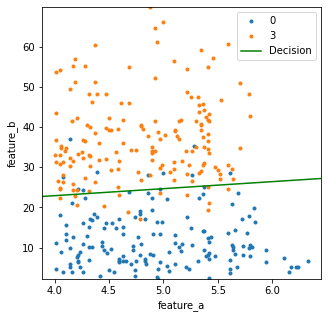

In [21]:
# Visualize the model, you may need to change your code.
# Visualize the training set
visualize_model(X_features_bias, pseudo_y, weights_bias)

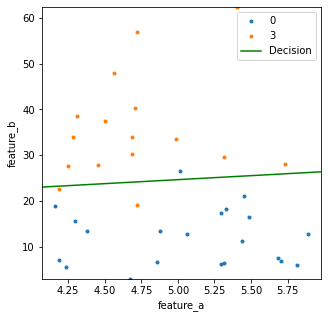

In [22]:
# Visualize the testing set
visualize_model(X_features_bias_test, pseudo_y_test, weights_bias)

#### Question:  
Does performance improve?

#### Answer:  
The performance does not improve significantly. Because although the train accuracy with bias (92.59%) is a little bit higher than the train accuracy without bias (92.28%), we can see that the test accuracy with bias (91.89%) is exactly the same as the test accuracy without bias (91.89%).

# 3. Linear Classification with Finite Differences

Rather than use pseudo inverse (analytically solving your optimization equation). Instead, initialize your weights parameter w to some random numbers. Move w some small epsilon amount in the each direction to compute the total change in your loss and calculate the gradient. Then update w by taking a small step in that gradient direction. You can execute this in a for loop for a set number of iterations, or until the gradient reaches some threshold value of not changing very much.

1. Solve for w
2. Get training and test accuracy every $n$ steps
3. Plot the decision boundary every $n$ steps

### Define a loss.

In [23]:
def loss(features, labels, weights) : 
    X = np.copy(features) # X_features_bias
    Y = np.copy(labels)   # pseudo_y
    W = np.copy(weights)  # weights_bias
    error = Y - np.dot(X, W)
    curr_loss = float(np.dot(error.T, error)) / 2
    return curr_loss

In [24]:
# This function calculates the gradients for backpropogation
def evaluate_gradient (features, labels, weights) :
    X = np.copy(features)
    Y = np.copy(labels)
    W = np.copy(weights)
    error = np.dot(X, W) - Y
    dL_dW = np.dot(X.T, error)
    return dL_dW

# This function calculates model classification accuracies
def evaluate_accuracy (features, labels, weights) :
    preds = np.dot(features, weights)
    corr_sum = 0
    for i in range(len(preds)) :
        if preds[i] <= 0 :
            preds[i] = -1
        else :
            preds[i] = +1
        if preds[i] == labels[i] :
            corr_sum = corr_sum + 1
    corr_acc = float(corr_sum) / len(labels)
    return corr_acc

### Now iteratively solve for your weights w, which includes the bias term.

----------------------------------------------------------------
Current Step (Iteration) Number = 1
Current Training Accuracy       = 0.3580
Current Testing  Accuracy       = 0.3514
Plot the training set decision boundary below


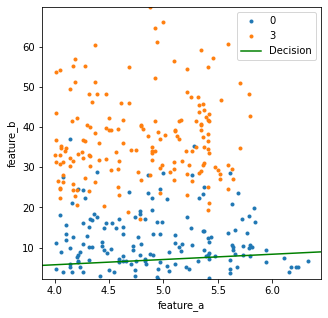

Plot the testing set decision boundary below


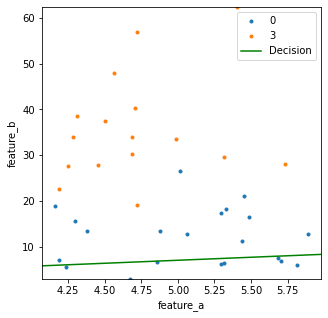

----------------------------------------------------------------
----------------------------------------------------------------
Current Step (Iteration) Number = 100000
Current Training Accuracy       = 0.9321
Current Testing  Accuracy       = 0.9189
Plot the training set decision boundary below


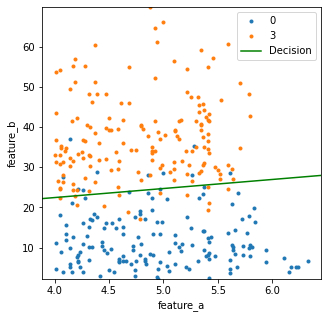

Plot the testing set decision boundary below


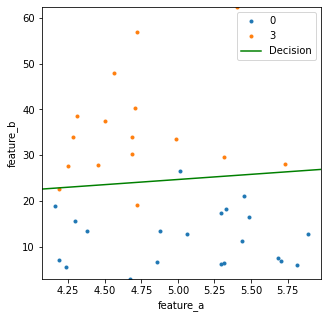

----------------------------------------------------------------
----------------------------------------------------------------
Current Step (Iteration) Number = 200000
Current Training Accuracy       = 0.9259
Current Testing  Accuracy       = 0.9189
Plot the training set decision boundary below


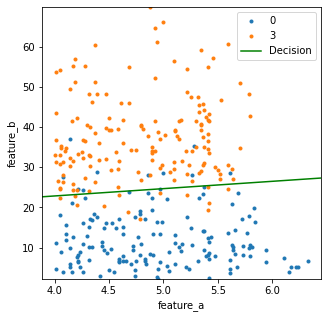

Plot the testing set decision boundary below


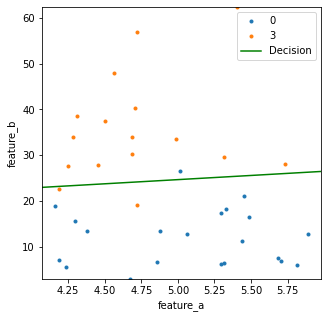

----------------------------------------------------------------
----------------------------------------------------------------
Current Step (Iteration) Number = 300000
Current Training Accuracy       = 0.9259
Current Testing  Accuracy       = 0.9189
Plot the training set decision boundary below


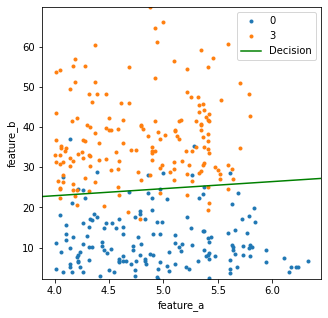

Plot the testing set decision boundary below


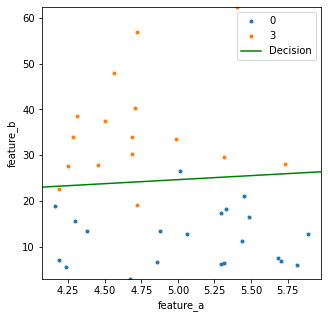

----------------------------------------------------------------
----------------------------------------------------------------
Current Step (Iteration) Number = 400000
Current Training Accuracy       = 0.9259
Current Testing  Accuracy       = 0.9189
Plot the training set decision boundary below


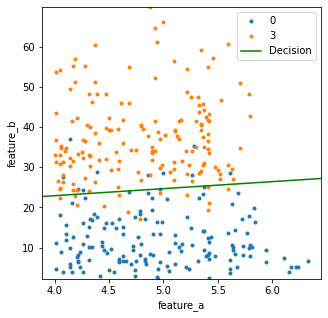

Plot the testing set decision boundary below


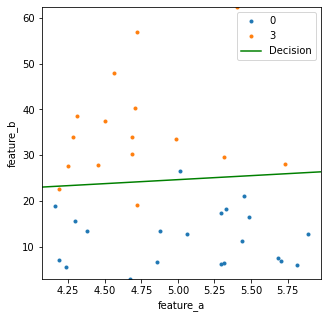

----------------------------------------------------------------
----------------------------------------------------------------
Current Step (Iteration) Number = 500000
Current Training Accuracy       = 0.9259
Current Testing  Accuracy       = 0.9189
Plot the training set decision boundary below


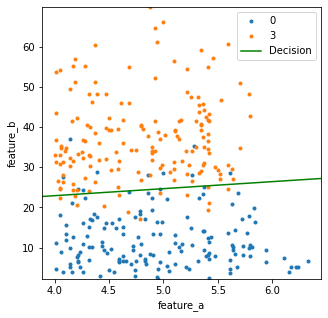

Plot the testing set decision boundary below


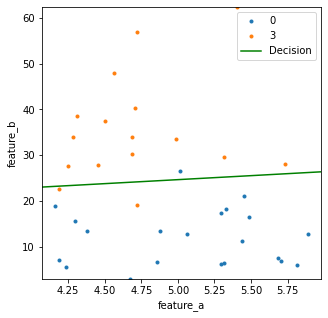

----------------------------------------------------------------


In [25]:
w              = np.random.rand(3)  # init weights to some random value.
num_iterations = 500000             # set this to the number of iterations
delta          = 1e-4               # This may need to be adjusted
step_size      = 0.5 * (1e-5)       # This may need to be adjusted

# Define an array for "every n steps", here n = 100000
# to get the training and test accuracies and        [required by (2)]
# to plot the training and test decision boundaries  [required by (3)]
every_n_steps = np.array([1, 100000, 200000, 300000, 400000, 500000])

for i in range(num_iterations):
    ### move w0 some delta and calculate derivative in w0 direction
    ### move w1 some delta and calculate derivative in w1 direction
    ### update w0 and w1 some step_size in the direction of steepest descent
    
    # Important Note: Instead of updating each weights one by one, 
    # I decide to update all weights in the vectorized form
    # during backpropogation (gradient descent)
    # Calculate the gradients
    dL_dW = evaluate_gradient(X_features_bias, pseudo_y, w)
    
    # Check if the maximum gradient hits the defined threshold
    # Here we have 3 weight values, if the biggest weight gradient descent 
    # value has already been smaller than the threshold, then we can confirm that
    # all 3 weights have almost stopped changing so that we can terminate the gradient descent
    if np.max(np.abs(dL_dW)) < delta :
        print("delta threshold activated!!!")
        print(i)
        break
    else :
        # Update weights with gradient descent
        w = w - step_size * dL_dW
    
    # (2) Get training and test accuracies every n steps
    # (3) Plot the training and test decision boundaries every n steps
    if (i + 1) in every_n_steps : 
        acc_train_epoch = evaluate_accuracy(X_features_bias, pseudo_y, w)
        acc_test_epoch  = evaluate_accuracy(X_features_bias_test, pseudo_y_test, w)
        print("----------------------------------------------------------------")
        print("Current Step (Iteration) Number = %i" % (i + 1))
        print("Current Training Accuracy       = %.4f" % acc_train_epoch)
        print("Current Testing  Accuracy       = %.4f" % acc_test_epoch)
        print("Plot the training set decision boundary below")
        visualize_model(X_features_bias, pseudo_y, w)
        print("Plot the testing set decision boundary below")
        visualize_model(X_features_bias_test, pseudo_y_test, w)
        print("----------------------------------------------------------------")

In [26]:
# (1) Solve for w (weights)
print("The weights solved from Gradient Descent are: ")
print(w)
print("The weights solved from Least Square Solution are: ")
print(weights_bias)

The weights solved from Gradient Descent are: 
[-0.09196476  0.05265293 -0.83865854]
The weights solved from Least Square Solution are: 
[-0.09195125  0.05265306 -0.83872835]


We can see that the weights derived from the Gradient Descent method and the Least Square Solution method are almost exactly the same.

In [27]:
# (2) Get the final training and test accuracies
print("Final Train Accuracy  (Pseudo method)   = %.4f" % acc_train_bias)
print("Final Train Accuracy  (Gradient method) = %.4f" % acc_train_epoch)
print("Final Test  Accuracy  (Pseudo method)   = %.4f" % acc_test_bias)
print("Final Test  Accuracy  (Gradient method) = %.4f" % acc_test_epoch)

Final Train Accuracy  (Pseudo method)   = 0.9259
Final Train Accuracy  (Gradient method) = 0.9259
Final Test  Accuracy  (Pseudo method)   = 0.9189
Final Test  Accuracy  (Gradient method) = 0.9189


We can also see that the final train and test accuracies from the Gradient Descent method are exactly the same as the train and test accuracies from the Least Square Solution method.

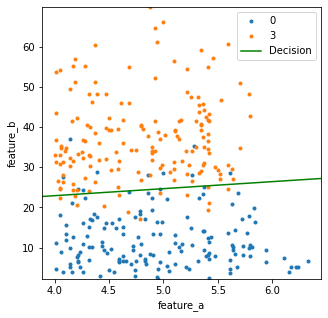

In [28]:
# (3) Plot the final training set decision boundary
visualize_model(X_features_bias, pseudo_y, w)

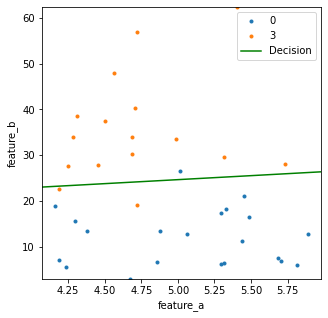

In [29]:
# (3) Plot the final testing set decision boundary
visualize_model(X_features_bias_test, pseudo_y_test, w)

# 4. Logistic Classification with Finite Differences

Now, let's consider the same problem with a different loss function.

$$L = \frac{1}{N}\sum_{i=1}^n ln(1 + e^{-y^{(i)}W^{T}x^{(i)}})$$

Use finite differences to compute the gradient and iteratively calculate $W$

1. Solve for x
2. Get training and test accuracy every $n$ steps
3. Plot the decision boundary every $n$ steps


In [30]:
logistic_y = np.copy(y_train)
logistic_y[y_train == number_a] = -1
logistic_y[y_train == number_b] = 1

logistic_y_test = np.copy(y_test)
logistic_y_test[y_test == number_a] = -1
logistic_y_test[y_test == number_b] = 1

In [31]:
def logistic_loss(features, labels, weights, x, y): 
    # Important Note: I do not need to specify the original logistic loss function here, 
    # because I define another "eval_gradient_log" function below 
    # to calculate the derivatives (gradients) of the logistic loss function 
    # so that I can update weights during gradient descent (backpropogation)
    return np.inf

In [32]:
# This function calculates the gradients (derivatives) of the 
# logistic loss function for gradient descent (backpropogation)
def eval_gradient_log (features, labels, weights) :
    X = np.copy(features)
    Y = np.copy(labels)
    W = np.copy(weights)
    N = X.shape[0]
    dL_dW = np.zeros((X.shape[1],))
    for i in range(N) :
        # Encounter gradient explosion in the final convolution section
        # exp_base = np.exp((-1) * Y[i] * np.dot(X[i], W))
        # Use Clipping to stop gradient explosion
        exp_base = np.clip(np.exp((-1) * Y[i] * np.dot(X[i], W)), 
                           a_min = 0, 
                           a_max = 1e+100)
        
        for j in range(X.shape[1]) :
            dL_dW[j] += float((exp_base) / (1 + exp_base)) * ((-1) * Y[i] * X[i, j])
            
    dL_dW = dL_dW / float(N)
    return dL_dW

--------------------------------------------------------------------------
Current Step (Iteration) Number = 1
Current Training Accuracy       = 0.5154
Current Testing  Accuracy       = 0.4324
Plot the training set decision boundary below


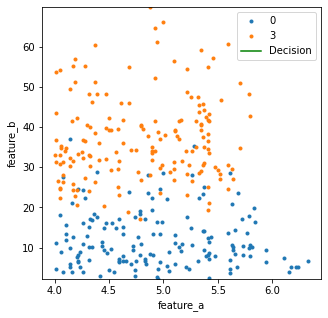

Plot the testing set decision boundary below


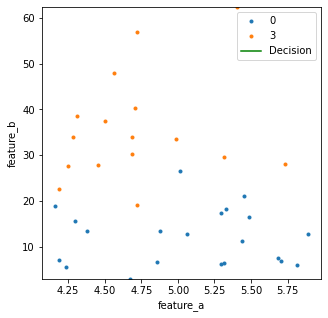

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Current Step (Iteration) Number = 200
Current Training Accuracy       = 0.9290
Current Testing  Accuracy       = 0.9189
Plot the training set decision boundary below


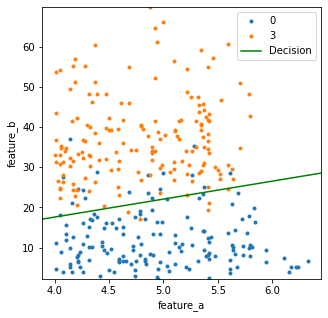

Plot the testing set decision boundary below


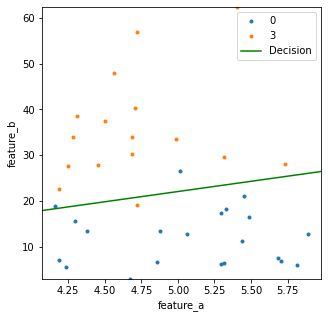

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Current Step (Iteration) Number = 400
Current Training Accuracy       = 0.9290
Current Testing  Accuracy       = 0.9459
Plot the training set decision boundary below


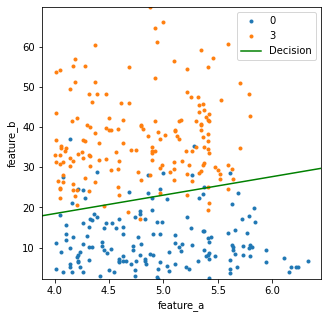

Plot the testing set decision boundary below


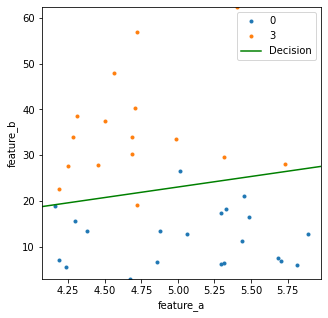

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Current Step (Iteration) Number = 600
Current Training Accuracy       = 0.9259
Current Testing  Accuracy       = 0.9459
Plot the training set decision boundary below


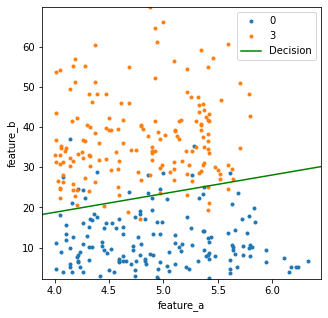

Plot the testing set decision boundary below


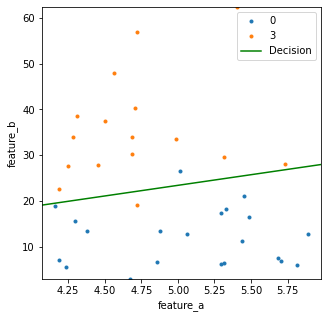

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Current Step (Iteration) Number = 800
Current Training Accuracy       = 0.9290
Current Testing  Accuracy       = 0.9459
Plot the training set decision boundary below


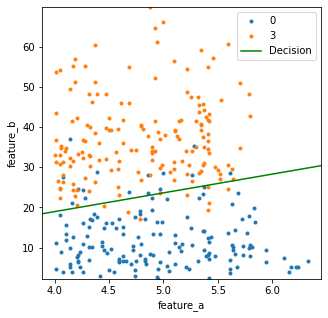

Plot the testing set decision boundary below


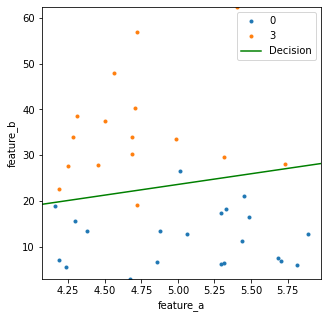

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Current Step (Iteration) Number = 1000
Current Training Accuracy       = 0.9290
Current Testing  Accuracy       = 0.9459
Plot the training set decision boundary below


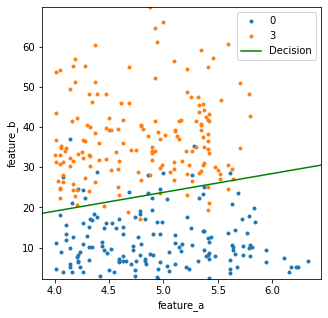

Plot the testing set decision boundary below


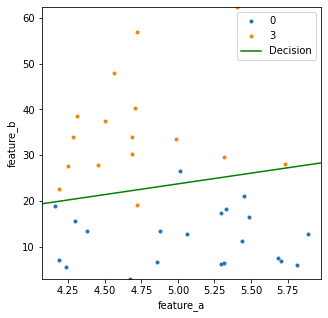

--------------------------------------------------------------------------


In [33]:
w_logistic     = np.random.rand(3)   # init weights to some random value.
num_iterations = 1000                # set this to the number of iterations
delta          = 1e-4
step_size      = 0.01

# Define an array for "every n steps", here n = 200
# to get the training and test accuracies and        [required by (2)]
# to plot the training and test decision boundaries  [required by (3)]
every_n_steps = np.array([1, 200, 400, 600, 800, 1000])

for i in range(num_iterations):
    # Calculate the gradients of the logistic loss function
    dL_dW = eval_gradient_log(X_features_bias, logistic_y, w_logistic)
    
    # Check if the maximum gradient hits the defined threshold
    if np.max(np.abs(dL_dW)) < delta :
        print("delta threshold activated!!!")
        break
    else :
        # Update weights with gradient descent
        w_logistic = w_logistic - step_size * dL_dW
    
    # (2) Get training and test accuracies every n steps
    # (3) Plot the training and test decision boundaries every n steps
    if (i + 1) in every_n_steps : 
        acc_train_log = evaluate_accuracy(X_features_bias, logistic_y, w_logistic)
        acc_test_log  = evaluate_accuracy(X_features_bias_test, logistic_y_test, w_logistic)
        print("--------------------------------------------------------------------------")
        print("Current Step (Iteration) Number = %i" % (i + 1))
        print("Current Training Accuracy       = %.4f" % acc_train_log)
        print("Current Testing  Accuracy       = %.4f" % acc_test_log)
        print("Plot the training set decision boundary below")
        visualize_model(X_features_bias, logistic_y, w_logistic)
        print("Plot the testing set decision boundary below")
        visualize_model(X_features_bias_test, logistic_y_test, w_logistic)
        print("--------------------------------------------------------------------------")

In [34]:
# (1) Solve for w (weights)
print("The weights solved from Linear Classification (Pseudo method) are: ")
print(weights_bias)
print("The weights solved from Linear Classification (Gradient method) are: ")
print(w)
print("The weights solved from Logistic Classification (Gradient method) are: ")
print(w_logistic)

The weights solved from Linear Classification (Pseudo method) are: 
[-0.09195125  0.05265306 -0.83872835]
The weights solved from Linear Classification (Gradient method) are: 
[-0.09196476  0.05265293 -0.83865854]
The weights solved from Logistic Classification (Gradient method) are: 
[-1.25951471  0.26893133 -0.08670082]


We can see that the weights solved from Linear Classification and Logistic Classification are actually quite different.

In [35]:
# (2) Get the final training and test accuracies
print("Final Train Accuracy (Linear   / Pseudo)   = %.4f" % acc_train_bias)
print("Final Train Accuracy (Linear   / Gradient) = %.4f" % acc_train_epoch)
print("Final Train Accuracy (Logistic / Gradient) = %.4f" % acc_train_log)
print("Final Test  Accuracy (Linear   / Pseudo)   = %.4f" % acc_test_bias)
print("Final Test  Accuracy (Linear   / Gradient) = %.4f" % acc_test_epoch)
print("Final Test  Accuracy (Logistic / Gradient) = %.4f" % acc_test_log)

Final Train Accuracy (Linear   / Pseudo)   = 0.9259
Final Train Accuracy (Linear   / Gradient) = 0.9259
Final Train Accuracy (Logistic / Gradient) = 0.9290
Final Test  Accuracy (Linear   / Pseudo)   = 0.9189
Final Test  Accuracy (Linear   / Gradient) = 0.9189
Final Test  Accuracy (Logistic / Gradient) = 0.9459


We can see that both the training (92.90%) and test (94.59%) accuracies of the Logistic Classification with Logistic Loss Function are higher/better than the training (92.59%) and test (91.89%) accuracies of the Linear Classification.

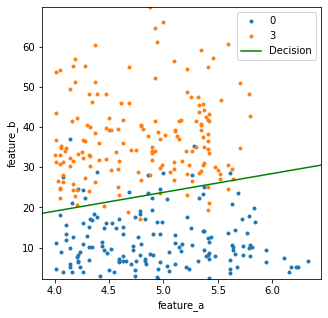

In [36]:
# (3) Plot the final training set decision boundary
visualize_model(X_features_bias, logistic_y, w_logistic)

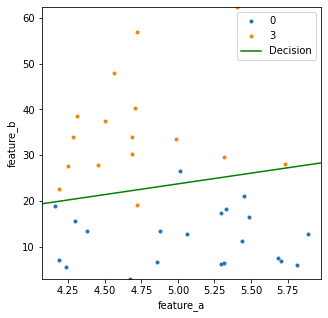

In [37]:
# (3) Plot the final testing set decision boundary
visualize_model(X_features_bias_test, logistic_y_test, w_logistic)

# Part II

In Parts II and III, we'll add some very small modifications to the above code that you just wrote, and will re-run it to examine how the performance changes. 

For Part II, let’s repeat the exercise above (Part I), but using a different set of features (you don't have to redo the pseudo-inverse derivation or anything like that - just change how you're defining the two features of interest in the associated fucntion). Here, let’s assume that we have a camera that has just two pixels in it, which is taking pictures of the MNIST image dataset. One of these two pixels will detect the total intensity from the top half of each digit to form feature x_1, and the other pixel will detect the total intensity from the bottom half of each digit to form feature x_2. Please use these two top/bottom total intensities to form a new feature vector for each MNIST image that you’re using for classification, and repeat the exercise above to obtain a plot of classification performance and an average classification accuracy score. 

**Note that this classification score (in some sense) reflects what would be possible with a "normal" camera.**

 - Plot Points after feature generation
 - Linear Classification (Pseudo or Gradient method)
   - test/train accuracy
 - Logistic Classification
   - test/train accuracy

In [38]:
def compute_features(vector):
    image = vector.reshape(8, 8) # get back original image shape
    def compute_feature_a(image):
        # compute_feature_a will compute ...
        # return np.random.rand(1)[0]
        top_intensity = float(np.mean(image[0:4, :]))
        return top_intensity

    def compute_feature_b(image):
        # compute_feature_b will compute ...
        # return np.random.rand(1)[0]
        bottom_intensity = float(np.mean(image[4:8, :]))
        return bottom_intensity
    
    return compute_feature_a(image), compute_feature_b(image)

In [39]:
# Train Set
# Feature Generation
X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_features_a = X_features[np.where(y_train==number_a)]
X_features_b = X_features[np.where(y_train==number_b)]
# Label Generation
pseudo_y = np.copy(y_train)
pseudo_y[y_train == number_a] = -1
pseudo_y[y_train == number_b] = 1

# Test Set
# Feature Generation
X_features_test = np.apply_along_axis(compute_features, 1,
                                      X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
X_features_test_a = X_features_test[np.where(y_test==number_a)]
X_features_test_b = X_features_test[np.where(y_test==number_b)]
# Label Generation
pseudo_y_test = np.copy(y_test)
pseudo_y_test[y_test == number_a] = -1
pseudo_y_test[y_test == number_b] = 1

- Plot points after feature generation

(3.0625, 6.84375)

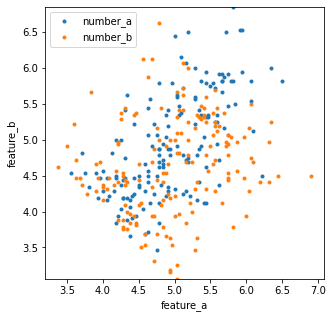

In [40]:
# Plot Train Set
plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.', label = "number_a")
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.', label = "number_b")
plt.legend()
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max())

(3.5625, 6.28125)

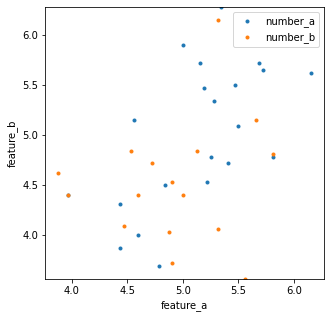

In [41]:
# Plot Test Set
plt.figure(figsize=(5,5))
plt.plot(X_features_test_a[:, 0], X_features_test_a[:, 1], '.', label = "number_a")
plt.plot(X_features_test_b[:, 0], X_features_test_b[:, 1], '.', label = "number_b")
plt.legend()
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features_test[:, 1].min(), X_features_test[:, 1].max())

In [42]:
# Add bias to features in the training set
# Add bias to features in the testing set
bias_train = np.ones((X_features.shape[0], 1), dtype = int)
bias_test = np.ones((X_features_test.shape[0], 1), dtype = int)
X_features_bias = np.hstack((X_features, bias_train))
X_features_bias_test = np.hstack((X_features_test, bias_test))

- Linear Classification (Pseudo-Inverse method)
    - Test/Train Accuracy

In [43]:
# Find w and bias
weights_bias = find_weights(X_features_bias, pseudo_y)
print("[weight0, weight1, bias]")
print(weights_bias)

[weight0, weight1, bias]
[ 0.17117346 -0.35398622  0.87340527]


In [44]:
# Compute the test accuracy and test error
acc_train_linear = accuracy_metrics(X_features_bias, pseudo_y)
acc_test_linear  = accuracy_metrics(X_features_bias_test, pseudo_y_test)
print("Train Accuracy (Linear / Pseudo) = %.4f" % acc_train_linear)
print("Test  Accuracy (Linear / Pseudo) = %.4f" % acc_test_linear)

Train Accuracy (Linear / Pseudo) = 0.5802
Test  Accuracy (Linear / Pseudo) = 0.6486


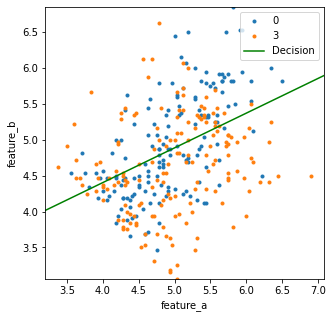

In [45]:
# Visualize decision boundary in the training set
visualize_model(X_features_bias, pseudo_y, weights_bias)

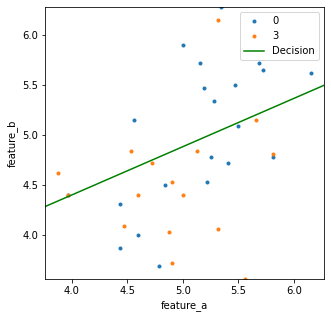

In [46]:
# Visualize decision boundary in the test set
visualize_model(X_features_bias_test, pseudo_y_test, weights_bias)

- Logistic Classification (Gradient Descent method)
    - Test/Train Accuracy

In [47]:
w_logistic     = np.random.rand(3)   # init weights to some random value.
num_iterations = 10000               # set this to the number of iterations
delta          = 1e-4
step_size      = 0.1

# Define an array for "every n steps", here n = 2000
every_n_steps = np.array([1, 2000, 4000, 6000, 8000, 10000])

for i in range(num_iterations):
    # Calculate the gradients of the logistic loss function
    dL_dW = eval_gradient_log(X_features_bias, logistic_y, w_logistic)
    
    # Check if the maximum gradient hits the defined threshold
    if np.max(np.abs(dL_dW)) < delta :
        print("delta threshold activated!!!")
        break
    else :
        # Update weights with gradient descent
        w_logistic = w_logistic - step_size * dL_dW
    
    # (2) Get training and test accuracies every n steps
    if (i + 1) in every_n_steps : 
        acc_train_log = evaluate_accuracy(X_features_bias, logistic_y, w_logistic)
        acc_test_log  = evaluate_accuracy(X_features_bias_test, logistic_y_test, w_logistic)
        print("--------------------------------------------------------------------------")
        print("Current Step (Iteration) Number = %i" % (i + 1))
        print("Current Training Accuracy       = %.4f" % acc_train_log)
        print("Current Testing  Accuracy       = %.4f" % acc_test_log)
        print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Current Step (Iteration) Number = 1
Current Training Accuracy       = 0.5154
Current Testing  Accuracy       = 0.4324
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Current Step (Iteration) Number = 2000
Current Training Accuracy       = 0.5679
Current Testing  Accuracy       = 0.5676
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Current Step (Iteration) Number = 4000
Current Training Accuracy       = 0.5772
Current Testing  Accuracy       = 0.5946
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Current Step (Iteration) Number = 6000
Current Training Accuracy       = 0.5741
Current Testing  Accuracy       = 0

In [48]:
print("[weight0, weight1, bias]")
print(w_logistic)

[weight0, weight1, bias]
[ 0.37265747 -0.74055429  1.75429635]


In [49]:
print("Train Accuracy (Logistic / Gradient) = %.4f" % acc_train_log)
print("Test  Accuracy (Logistic / Gradient) = %.4f" % acc_test_log)

Train Accuracy (Logistic / Gradient) = 0.5802
Test  Accuracy (Logistic / Gradient) = 0.6216


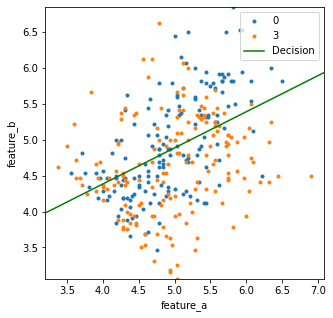

In [50]:
# Visualize decision boundary in the training set
visualize_model(X_features_bias, logistic_y, w_logistic)

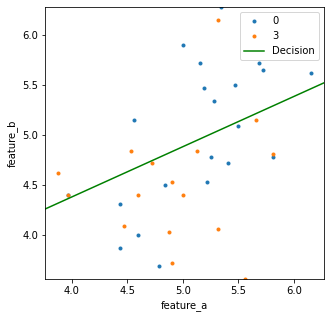

In [51]:
# Visualize decision boundary in the test set
visualize_model(X_features_bias_test, logistic_y_test, w_logistic)

# Part III

Once again, in Part III, we'll add a very small modification to your code in Part II. Here, let’s assume that this camera has a special filter in its lens that blurs the MNIST image in a special way before it is detected. Let’s model this 2D blur as a convolution with the 3x3 filter below.

$$X = 
\begin{bmatrix}
    -1 & 0 & 1 \\
    -1 & 0 & 1 \\
    -1 & 0 & 1 \\
\end{bmatrix}$$

Convolve the set of MNIST images with this kernel before proceeding to compute the two features of interest as in Part I: the total image intensity, and the image symmetry. Repeat the exercise above to obtain a plot of classification performance and an average classification accuracy score.

**Note that this classification score (in some sense) reflects what would be possible with a “computational” camera, which has a special aperture shape for enhanced image classification.**

 - Plot Points after feature generation
 - Linear Classification (Pseudo or Gradient method)
   - test/train accuracy
 - Logistic Classification
   - test/train accuracy

In [52]:
from scipy.signal import convolve2d
import warnings
warnings.filterwarnings("ignore")

X_filter = np.array([[-1, 0, 1], 
                     [-1, 0, 1], 
                     [-1, 0, 1]])

In [53]:
# please complete this function:
def compute_features(vector):
    img = vector.reshape(8, 8) # get back original image shape
    #image = convolve2d(img, X_filter, mode = "same")
    image = convolve2d(img, X_filter)
    #print(image.shape)
    #print(image)
    def compute_feature_a(image):
        # compute_feature_a will compute ...
        # return np.random.rand(1)[0]
        image_mean = float(np.mean(image))
        #print("image_mean = " + str(image_mean))
        return image_mean

    def compute_feature_b(image):
        # compute_feature_b will compute ...
        # return np.random.rand(1)[0]
        img2 = np.flip(image)
        err_sum = 0
        for i in range(image.shape[0]) :
            for j in range(image.shape[1]) :
                err_sum = err_sum + (image[i, j] - img2[i, j]) ** 2
        mse_symmetry = float(err_sum) / (image.shape[0] * image.shape[1])
        #print("mse_symmetry = " + str(mse_symmetry))
        return mse_symmetry
    
    return compute_feature_a(image), compute_feature_b(image)

In [54]:
# Train Set
# Feature Generation
X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_features_a = X_features[np.where(y_train==number_a)]
X_features_b = X_features[np.where(y_train==number_b)]
# Label Generation
pseudo_y = np.copy(y_train)
pseudo_y[y_train == number_a] = -1
pseudo_y[y_train == number_b] = 1

# Test Set
# Feature Generation
X_features_test = np.apply_along_axis(compute_features, 1,
                                      X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
X_features_test_a = X_features_test[np.where(y_test==number_a)]
X_features_test_b = X_features_test[np.where(y_test==number_b)]
# Label Generation
pseudo_y_test = np.copy(y_test)
pseudo_y_test[y_test == number_a] = -1
pseudo_y_test[y_test == number_b] = 1

- Plot points after feature generation

(439.12, 1731.04)

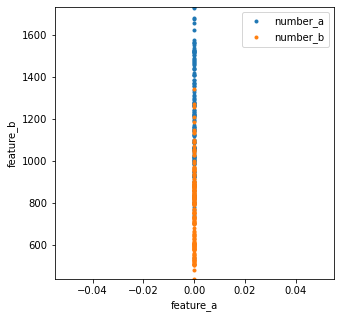

In [55]:
# Plot Train Set
plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.', label = "number_a")
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.', label = "number_b")
plt.legend()
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max())

(600.16, 1779.48)

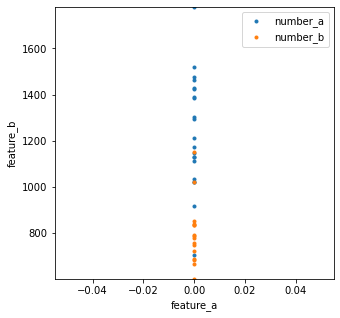

In [56]:
# Plot Test Set
plt.figure(figsize=(5,5))
plt.plot(X_features_test_a[:, 0], X_features_test_a[:, 1], '.', label = "number_a")
plt.plot(X_features_test_b[:, 0], X_features_test_b[:, 1], '.', label = "number_b")
plt.legend()
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features_test[:, 1].min(), X_features_test[:, 1].max())

In [57]:
# Add bias to features in the training set
# Add bias to features in the testing set
bias_train = np.ones((X_features.shape[0], 1), dtype = int)
bias_test = np.ones((X_features_test.shape[0], 1), dtype = int)
X_features_bias = np.hstack((X_features, bias_train))
X_features_bias_test = np.hstack((X_features_test, bias_test))

- Linear Classification (Pseudo-Inverse method)
    - Test/Train Accuracy

In [58]:
# Find w and bias
weights_bias = find_weights(X_features_bias, pseudo_y)
print("[weight0, weight1, bias]")
print(weights_bias)

[weight0, weight1, bias]
[ 0.         -0.00226172  2.22838782]


In [59]:
# Compute the test accuracy and test error
acc_train_linear = accuracy_metrics(X_features_bias, pseudo_y)
acc_test_linear  = accuracy_metrics(X_features_bias_test, pseudo_y_test)
print("Train Accuracy (Linear / Pseudo) = %.4f" % acc_train_linear)
print("Test  Accuracy (Linear / Pseudo) = %.4f" % acc_test_linear)

Train Accuracy (Linear / Pseudo) = 0.8179
Test  Accuracy (Linear / Pseudo) = 0.8919


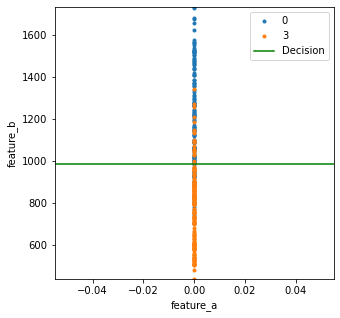

In [60]:
# Visualize decision boundary in the training set
visualize_model(X_features_bias, pseudo_y, weights_bias)

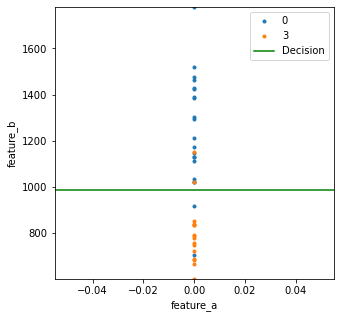

In [61]:
# Visualize decision boundary in the test set
visualize_model(X_features_bias_test, pseudo_y_test, weights_bias)

- Logistic Classification (Gradient Descent method)
    - Test/Train Accuracy

In [88]:
w_logistic     = np.random.rand(3)   # init weights to some random value.
num_iterations = 1000                 # set this to the number of iterations
delta          = 1e-4
step_size      = 0.0001

for i in range(num_iterations):
    # Calculate the gradients of the logistic loss function
    dL_dW = eval_gradient_log(X_features_bias, logistic_y, w_logistic)
    
    # Check if the maximum gradient hits the defined threshold
    if np.max(np.abs(dL_dW)) < delta :
        print("delta threshold activated!!!")
        break
    else :
        # Update weights with gradient descent
        w_logistic = w_logistic - step_size * dL_dW
     
    acc_train_log = evaluate_accuracy(X_features_bias, logistic_y, w_logistic)
    acc_test_log  = evaluate_accuracy(X_features_bias_test, logistic_y_test, w_logistic)
    
    # Important Note: After several experiments, I found that both the training and testing
    # accuracies of this Logistic Classification (Gradient method) model were very unstable.
    # Therefore, I have to introduce Early Stopping during training and set a
    # relatively high threshold to ensure good classification accuracy.
    # Introduce Early Stopping below
    if acc_test_log > 0.90 :
        print("Good Test Accuracy!")
        break

Good Test Accuracy!


In [89]:
print("[weight0, weight1, bias]")
print(w_logistic)

[weight0, weight1, bias]
[ 0.10344832 -0.00044227  0.40086846]


In [90]:
print("Train Accuracy (Logistic / Gradient) = %.4f" % acc_train_log)
print("Test  Accuracy (Logistic / Gradient) = %.4f" % acc_test_log)

Train Accuracy (Logistic / Gradient) = 0.8210
Test  Accuracy (Logistic / Gradient) = 0.9189


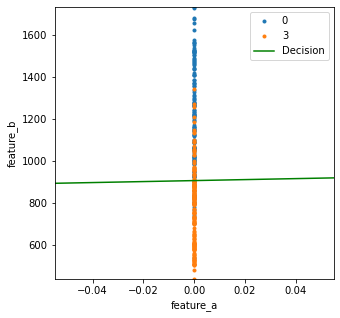

In [91]:
# Visualize decision boundary in the training set
visualize_model(X_features_bias, logistic_y, w_logistic)

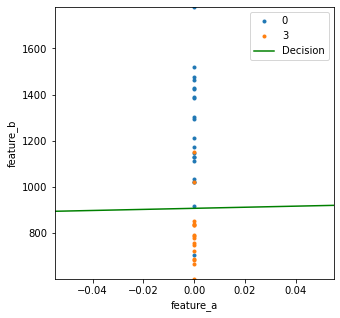

In [92]:
# Visualize decision boundary in the test set
visualize_model(X_features_bias_test, logistic_y_test, w_logistic)